# 공공데이터 활용 상권 분석

# <MS 엑셀에서 UTF-8로된 CSV파일 불러오기>

기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 utf-8 형식으로 추출했다

개발자가 아닌 일반사용자의 경우 euc-kr(utf-8, utf-16)이 아닌 csv파일을 엑셀에서 바로 로드하면 한글이 모두 깨지게 된다.

따라서 바로 열지 않고 다음 절차를 거친다

- 엑셀을 실행하고 데이터 => 텍스트를 선택한다.
- 가져올 파일을 선택하고 확인을 클릭한다.
- 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인한다.
 => utf-8의 코드 페이지 넘버는 65001 이다.
- 구분 기호는 쉼표를 선택한다
 => 기본이 쉼표로 설정되어있음
** 업종(대분류) :  관광/여가/오락, 부동산, 생활서비스, 소매, 숙박, 스포츠, 음식, 학문/교육

# 데이터 셋 분류 정보 : 지역을 기준으로 분류 되어있음

각 파일명에 지역 : 강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북 으로 구성됨

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

한글 폰트 설정 방법 <br>
폰트 설정이 잘 안될 경우 아래 셀의 마지막 줄 주석을 풀고 실행해 본다

In [2]:
def get_font_family():
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        #Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv
        
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

#plt.rc("font", family=get_font_family())
    

In [3]:
#한글 폰트 설정

In [4]:
plt.rc("font", family="Malgun Gothic")

In [5]:
#특수 기호 설정

In [6]:
plt.rc("axes", unicode_minus=False)

<Axes: title={'center': '한글 데이터 그래프'}>

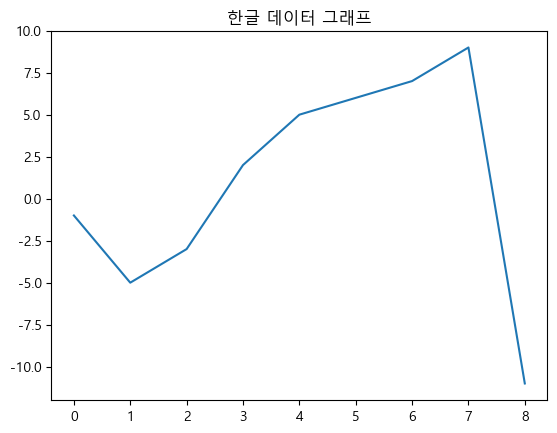

In [7]:
pd.Series([-1,-5,-3, 2,5,6,7,9,-11]).plot(title="한글 데이터 그래프")

In [8]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 982A-46F8

 C:\Users\ParkHanna\Desktop\HRD\BigData 디렉터리

2023-07-01  오후 10:47    <DIR>          .
2023-07-01  오후 10:47    <DIR>          ..
2023-07-01  오후 10:46    <DIR>          .ipynb_checkpoints
2023-07-01  오후 10:40            19,687 1 HRD BD numpy.ipynb
2023-07-01  오후 10:42           252,297 10 HRD BD  Word Cloud.ipynb
2023-07-01  오후 10:45         3,023,813 11 HRD BD 공공데이터_부동산.ipynb
2023-07-01  오후 10:46           251,257 12 HRD BD 공공데이터_부동산 2.ipynb
2023-07-01  오후 10:47            97,990 13 HRD BD 공공데이터 _ 상권 정보 분석.ipynb
2022-08-12  오후 02:03             9,867 1stplotpic.png
2022-08-12  오후 01:59           142,914 2 HRD BD pandas.ipynb
2022-08-12  오후 02:05            33,201 2ndplotpic.png
2022-08-12  오후 02:15           134,627 3 HRD BD Matplotlib .ipynb
2022-08-17  오후 01:34            56,289 4 HRD BD BigData 1.ipynb
2022-08-23  오후 03:04           502,177 5 HRD BD Big Data use Open API.ipynb
2022-08-23  오후 03:19            11,000 6 HRD BD Naver Open AP

In [9]:
df2 = pd.read_csv("C:/Users/ParkHanna/Desktop/HRD/BigData/data/소상공인서울_202206.csv")

In [10]:
df2

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346224,18466695,신내역시티부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1126010500103150000000004,NaN,서울특별시 중랑구 봉화산로59길 25,131800,2057.0,NaN,NaN,NaN,127.103704,37.611201
346225,18455989,석정칼국수,NaN,Q,음식,Q04,분식,Q04A02,국수/만두/칼국수,I56194,...,1126010100102260010031461,NaN,서울특별시 중랑구 면목로 446,131817,2160.0,NaN,1,NaN,127.086895,37.591754
346226,18454507,서울왕도숯불갈비,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1123010300104380010033192,NaN,서울특별시 동대문구 약령시로 122-3,130862,2573.0,NaN,NaN,NaN,127.043357,37.582867
346227,18447435,칠교,NaN,F,생활서비스,F13,기타서비스업,F13A01,사업경영상담,M71531,...,1154510100106870000000003,대륭21차,서울특별시 금천구 범안로 1126,153803,8595.0,NaN,NaN,NaN,126.887062,37.465200


In [11]:
df3 = pd.read_csv("C:/Users/ParkHanna/Desktop/HRD/BigData/data/소상공인부산_202206.csv")

In [12]:
df3

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
2,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,NaN,129.115397,35.143770
3,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
4,21683903,럭키사진관,NaN,F,생활서비스,F06,사진,F06A01,사진관,M73301,...,2638010200103250030010858,NaN,부산광역시 사하구 낙동대로 395,604830,49411.0,NaN,1,NaN,128.974794,35.102905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152896,18465196,천화일화,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,...,2629011000101892172031935,광이골드힐,부산광역시 남구 동항로 53-6,608845,48478.0,A,NaN,NaN,129.068730,35.127425
152897,18457565,옹헤야,디에이롯데동부산아울렛점,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2671025032100640000000001,롯데몰동부산점,부산광역시 기장군 기장읍 기장해안로 147,619902,46084.0,NaN,2,NaN,129.212806,35.192230
152898,18453880,더벤티,사하역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2638010100110820055039168,사하역비스타동원,부산광역시 사하구 낙동대로 280,604084,49343.0,302,2,NaN,128.984281,35.100133
152899,18458741,북구이웃사촌협동조합,NaN,F,생활서비스,F15,주택수리,F15A07,조립칸막이/파티션,F42499,...,2632010300104420001000001,NaN,부산광역시 북구 구만덕로60번길 66,616111,46607.0,가,3,NaN,129.041703,35.214022


In [13]:
df2.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
df3.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
sanf = pd.concat([df2,df3])

In [16]:
sang = sanf

In [17]:
sang

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152896,18465196,천화일화,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,...,2629011000101892172031935,광이골드힐,부산광역시 남구 동항로 53-6,608845,48478.0,A,NaN,NaN,129.068730,35.127425
152897,18457565,옹헤야,디에이롯데동부산아울렛점,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2671025032100640000000001,롯데몰동부산점,부산광역시 기장군 기장읍 기장해안로 147,619902,46084.0,NaN,2,NaN,129.212806,35.192230
152898,18453880,더벤티,사하역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2638010100110820055039168,사하역비스타동원,부산광역시 사하구 낙동대로 280,604084,49343.0,302,2,NaN,128.984281,35.100133
152899,18458741,북구이웃사촌협동조합,NaN,F,생활서비스,F15,주택수리,F15A07,조립칸막이/파티션,F42499,...,2632010300104420001000001,NaN,부산광역시 북구 구만덕로60번길 66,616111,46607.0,가,3,NaN,129.041703,35.214022


In [18]:
sang.shape

(499130, 39)

In [19]:
pd.options.display.max_columns = 39

In [20]:
sang.head(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1111015200100430001,1,대지,43,1.0,서울특별시 종로구 봉익동 43-1,111104100163,서울특별시 종로구 서순라길,17,10.0,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700101390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
6,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800114850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436
7,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,기타 주점업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106150001,1,대지,615,1.0,서울특별시 강남구 신사동 615-1,116803122007,서울특별시 강남구 압구정로,216,NaN,1168010700106150001009703,코끼리상가,서울특별시 강남구 압구정로 216,135894,6023.0,NaN,1,NaN,127.031012,37.528073
8,21938782,무비디자인,NaN,R,학문/교육,R02,학원-창업취업취미,R02A12,학원-디자인,P85659,기타 기술 및 직업훈련학원,11,서울특별시,11440,마포구,1144060000,대흥동,1144011000,노고산동,1144011000101070017,1,대지,107,17.0,서울특별시 마포구 노고산동 107-17,114403005016,서울특별시 마포구 백범로,8,NaN,1144011000101070017018922,우정마샹스오피스텔,서울특별시 마포구 백범로 8,121807,4100.0,NaN,NaN,NaN,126.936717,37.553996
9,24590384,우신타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,자동차 타이어 및 튜브 판매업,11,서울특별시,11260,중랑구,1126062000,묵1동,1126010400,묵동,1126010400101610023,1,대지,161,23.0,서울특별시 중랑구 묵동 161-23,112603106010,서울특별시 중랑구 중랑역로,275,NaN,1126010400101610023009289,NaN,서울특별시 중랑구 중랑역로 275,131140,2018.0,NaN,1,NaN,127.078492,37.616621


In [21]:
sang.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            152891, 152892, 152893, 152894, 152895, 152896, 152897, 152898,
            152899, 152900],
           dtype='int64', length=499130)

In [22]:
sang.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
sang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499130 entries, 0 to 152900
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     499130 non-null  int64  
 1   상호명        499129 non-null  object 
 2   지점명        81502 non-null   object 
 3   상권업종대분류코드  499130 non-null  object 
 4   상권업종대분류명   499130 non-null  object 
 5   상권업종중분류코드  499130 non-null  object 
 6   상권업종중분류명   499130 non-null  object 
 7   상권업종소분류코드  499130 non-null  object 
 8   상권업종소분류명   499130 non-null  object 
 9   표준산업분류코드   466101 non-null  object 
 10  표준산업분류명    466101 non-null  object 
 11  시도코드       499130 non-null  int64  
 12  시도명        499130 non-null  object 
 13  시군구코드      499130 non-null  int64  
 14  시군구명       499130 non-null  object 
 15  행정동코드      499130 non-null  int64  
 16  행정동명       499130 non-null  object 
 17  법정동코드      499130 non-null  int64  
 18  법정동명       499130 non-null  object 
 19  지번코드       499130 non-n

In [24]:
sang.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

# 전처리 결측치 처리

In [25]:
sang.isnull().sum()

상가업소번호            0
상호명               1
지점명          417628
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      33029
표준산업분류명       33029
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         95442
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        431165
건물관리번호            0
건물명          264306
도로명주소             0
구우편번호             0
신우편번호            49
동정보          440345
층정보          222889
호정보          499130
경도                0
위도                0
dtype: int64

In [26]:
n_su = sang.isnull().sum()
n_su

상가업소번호            0
상호명               1
지점명          417628
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      33029
표준산업분류명       33029
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         95442
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        431165
건물관리번호            0
건물명          264306
도로명주소             0
구우편번호             0
신우편번호            49
동정보          440345
층정보          222889
호정보          499130
경도                0
위도                0
dtype: int64

<Axes: >

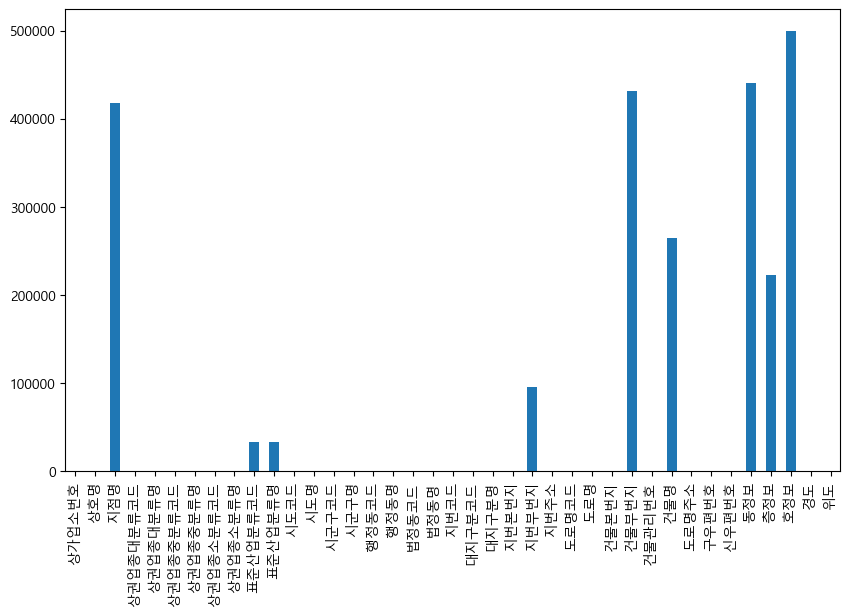

In [27]:
n_su.plot.bar(figsize=(10,6))

<Axes: >

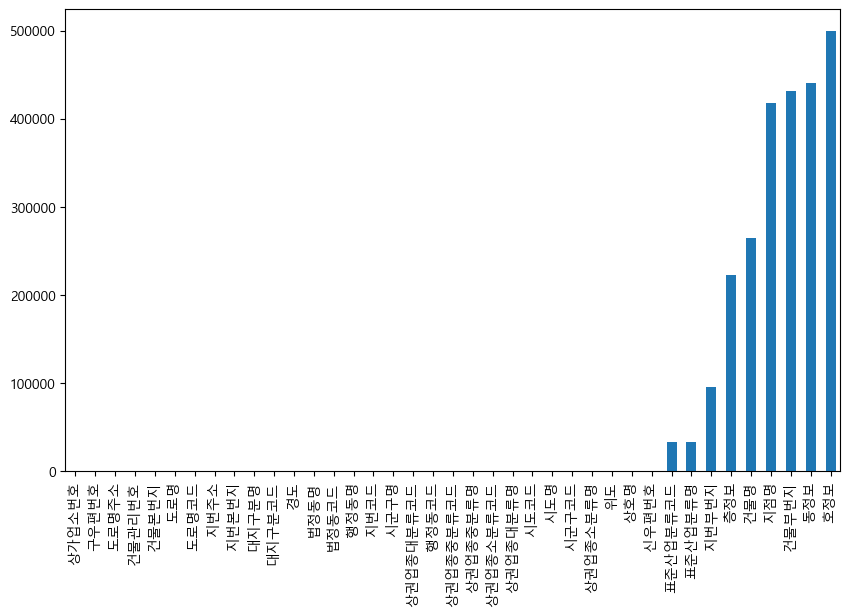

In [28]:
n_su.sort_values().plot.bar(figsize=(10,6))

missingno 로 결측치 시각화 하기

In [29]:
!pip install missingno

Error processing line 3 of C:\Users\ParkHanna\anaconda3\lib\site-packages\googleapis_common_protos-1.56.4-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\ParkHanna\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [30]:
import missingno as msno

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

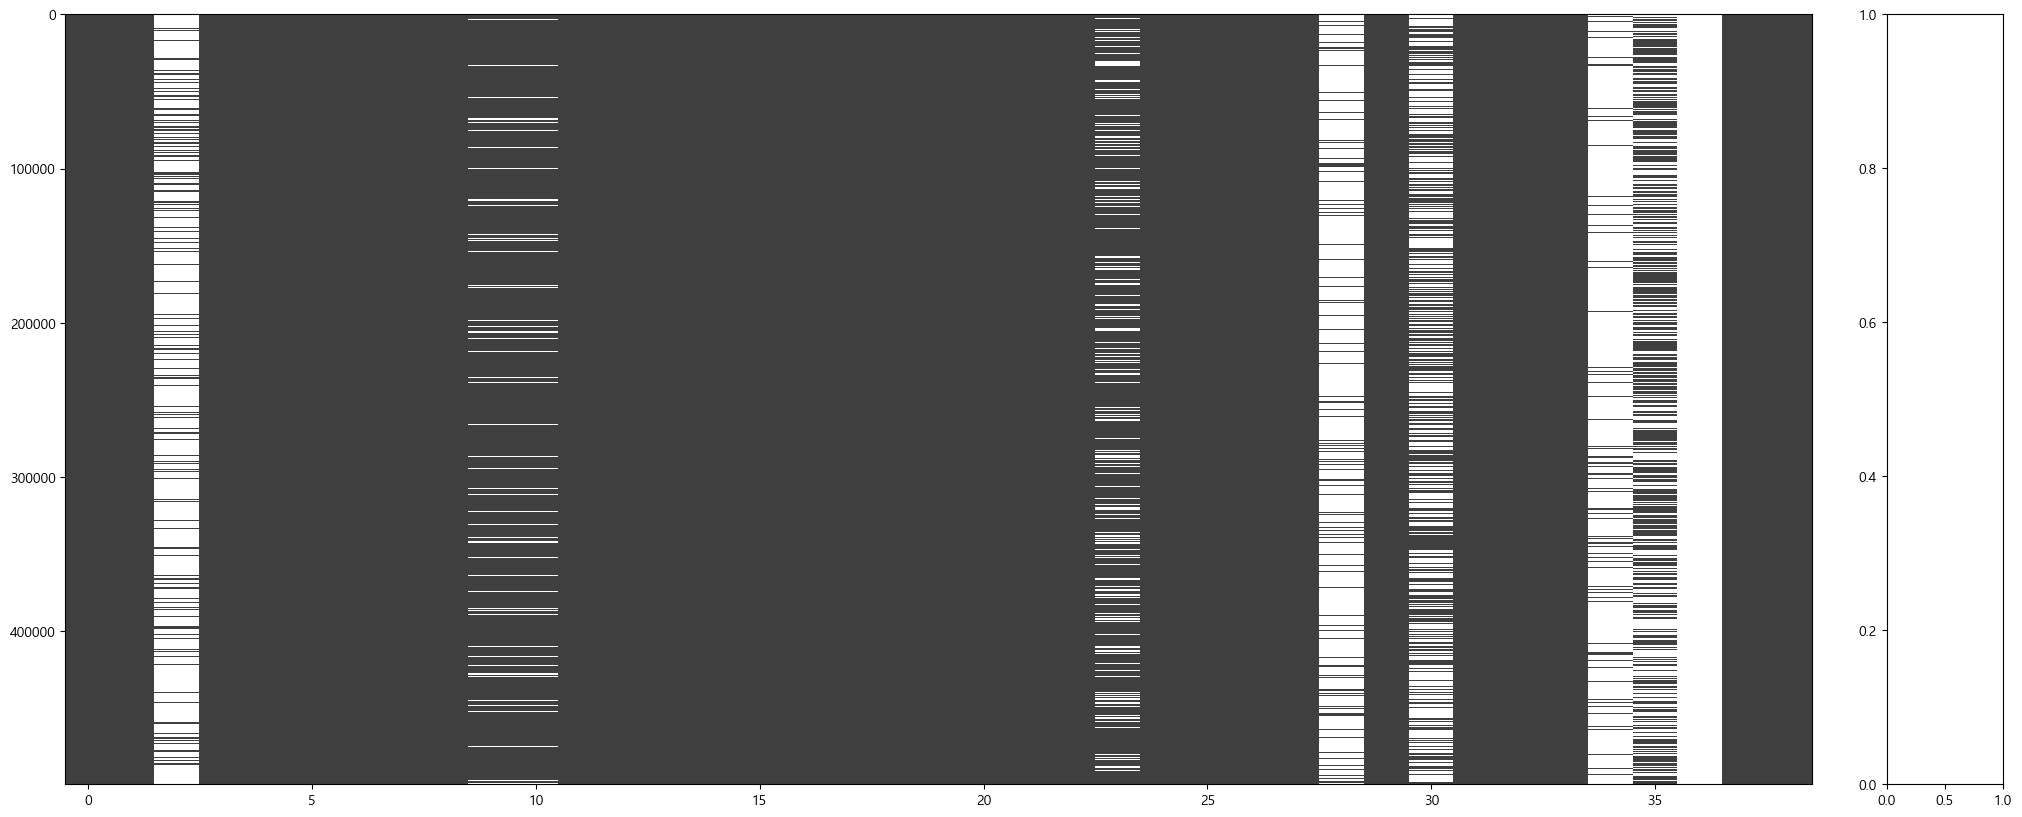

In [31]:
msno.matrix(sang)

In [ ]:
msno.heatmap(sang)

In [ ]:
msno.dendrogram(sang)

# 전처리 사용하지 않는 컬럼 제거하기

In [ ]:
not_use = n_su.sort_values(ascending=False).head(9)
not_use

In [ ]:
not_use.index

In [ ]:
not_use_col = not_use.index

In [ ]:
not_use_col

In [ ]:
print(sang.shape)
sang=sang.drop(not_use_col, axis=1)
print(sang.shape)

In [ ]:
sang.info()

사용하지 않는 컬럼 제거

In [ ]:
cols = sang.columns
cols

In [ ]:
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

In [ ]:
print(sang.shape)

In [ ]:
sang=sang.drop(cols_code, axis=1)
print(sang.shape)

In [ ]:
sang.info()

# 행과 열을 기준으로 값 가져오기 

열 가져오기 <br>
형식) 데이터프레임이름.[열이름] => sang[열이름] 결과가 pandas의 series 형태로 반환 <br> => df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해줘야 함. 결과가 pandas의 dataframe 형태로 반환,  1개의 열을 2차원 리스트로 지정할 때에도 dataframe 형태로 반환이 됨

In [ ]:
sang

In [ ]:
sang.상호명

In [ ]:
sang["상호명"]

In [ ]:
sang[["상호명", "도로명주소"]]

행 기준 <br>
df.loc[행] <br>
df.loc[행,열]<br>
df.loc[행이름 혹은 번호] : 결과가 pandas series 형태로 반환<br>
df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해야함 <br>
 : 결과가 pandas의 dataframe 형태로 반환<br>
 : 1개의 행을 2차원 리스트로 지정할 때에도 dataframe 형태로 반환 됨


In [ ]:
sang.loc[0]

In [ ]:
sang.loc[[0,1,2]]

In [ ]:
sang.loc[0]["상호명"]

In [ ]:
sang.loc[0,"상호명"]

In [ ]:
sang.loc[[0,1,2],"상호명"]

In [ ]:
sang.loc[[0,1,2],["상호명",]]

In [ ]:
sang.loc[[0,1,2],["상호명","도로명주소"]]

# iloc으로 슬라이싱 

df.iloc[:] 전체 데이터 가져옴 <br>
df.iloc[행,열] 순으로 인덱스 번호 지정<br>
 : 은 전체를 의미 <br>
 
시작인덱스:끝나는인덱스 + 1을 써줌<br>
: 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미한다

In [ ]:
cols

In [ ]:
cols[:]

In [ ]:
cols[:5]

In [ ]:
cols[5:]

In [ ]:
cols[-5:]

In [ ]:
cols[:-5]

In [ ]:
sang.iloc[:5]
sang.iloc[:5,:5]

In [ ]:
sang.iloc[-5:,-5:]

# 기술 통계 값 보기

describe로 요약하기 <br>
describe 를 사용하면 데이터를 요약해 볼 수 있다<br>
기본적으로 수치형 데이터를 요약해서 보여줌 <br>
include, exclude 옵션으로 데이터 타입에 따른 요약 수치를 볼 수 있다 <br>
데이터의 갯수 ,평균, 표준 편타, 최솟값, 1사분위수 25%, 2사분위 수 50%, 3사분위 수 75%, 최댓값을 볼 수 있음

In [ ]:
sang.describe()

In [ ]:
sang[["위도","경도"]].describe()

# 개별 기술 통계 값 구하기

Computational tools — pandas 1.0.1 documentation

count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산

min, max 최솟값, 최댓값

argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환

idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환

quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    0.25 : 1사분위 수
    0.5 : 2사분위수 (quantile 의 기본 값)
    0.75 : 3사분위수

sum 수치 데이터의 합계

mean 평균

median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

mad 평균값으로부터의 절대 편차(absolute deviation)의 평균

std, var 표준편차, 분산을 계산

cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)

cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [ ]:
sang["위도"].count()

In [ ]:
sang["위도"].mean()

In [ ]:
sang["위도"].max()

In [ ]:
sang["위도"].min()

In [ ]:
sang["위도"].quantile(q=0.25)

In [ ]:
sang["위도"].quantile()

In [ ]:
sang["위도"].median()

In [ ]:
sang["위도"].mean()

In [ ]:
sang["위도"].var()

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.

In [ ]:
np.sqrt(sang["위도"].var())

In [ ]:
sang["위도"].std()

# 단변량 수치형 변수 시각화

In [ ]:
sns.distplot(sang["위도"])

In [ ]:
plt.axvline(sang["위도"].median(), linestyle=":", color="r")
plt.axvline(sang["위도"].mean(), linestyle="--", color="g")

sns.distplot(sang["위도"])

# 상관계수

###이변량 또는 다변량에 대해성 변수간의 관련성을 알아보기 필요함

피어슨 상관계수= (X 와 Y가 함께 변하는 정도)/(X 와 Y가 각각 변하는 정도)

In [ ]:
sang

r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.

결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계


In [ ]:
corr = sang.corr()

In [ ]:
corr

In [ ]:
sns.heatmap(corr, annot=True, cmap="Greens")

In [ ]:
sns.heatmap(corr)

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
sns.heatmap(corr,annot=True, cmap="Greens")

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Greens", mask=mask)

# 산점도로 이변량 수치형 변수 표현하기

In [ ]:
sns.scatterplot(data=sang.sample(1000), x="경도", y="위도")

In [ ]:
sns.regplot(data=sang.sample(1000), x="경도", y="위도")

In [ ]:
sns.lmplot(data=sang.sample(1000), x="경도", y="위도", hue="시도명")

# object 타입의 데이터 요약하기

In [ ]:
sang.describe(include="object")

In [ ]:
sang["상권업종대분류명"].describe()

In [ ]:
sang["상권업종대분류명"].unique()

In [ ]:
len(sang["상권업종대분류명"].unique())

In [ ]:
sang["상권업종대분류명"].nunique()

# 범주형 변수의 빈도수 구하기

In [ ]:
sang["상권업종대분류명"].value_counts()

In [ ]:
sang.info()

# 인덱싱과 필터로 서브셋 만들기

In [ ]:
sang["상권업종대분류명"] == "음식"

In [ ]:
sang[sang["상권업종대분류명"]=="음식"]

In [ ]:
sang_food =sang[sang["상권업종대분류명"] =="음식]"].copy()
                

In [ ]:
sang_food

강남구의 상권업종대분류 음식만 보기

In [ ]:
sang["시군구명"] == "강남구"

In [ ]:
sang[sang["시군구명"]=="강남구"]

In [ ]:
# 나란히 두개를 쓰면, 주피터 노트북의 실행 특성상 아래 명령만 실행결과를 보여준다. 
# 두가지에 대한 답을 얻기 위해서, 다른 방식으로 처리를 해야 한다.

# 위에서 각각은 실행이 되었지만, 둘은 비교값의 타입이 서로 같지 않아 비교가 안된다.
# 각각의 우선적으로 처리를 하고 같이 붙이면.

In [ ]:
(sang["시군구명"]=="강남구") & (sang["상권업종대분류명"] == "음식")

In [ ]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온다.

# 데이터 프레임 형태로 가져온다.

In [ ]:
sang[(sang["시군구명"] == "강남구") & (sang["상권업종대분류명"] == "음식")]

In [ ]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후
# "상권업종중분류명" 별로 빈도수를 구한다.

In [ ]:
sang[(sang["시군구명"] == "강남구") & (sang["상권업종대분류명"] == "음식")]["상권업종중분류명"].value_counts()

In [ ]:
sang.loc[(sang["시군구명"] == "강남구") & (sang["상권업종대분류명"] == "음식")]["상권업종중분류명"].value_counts()

In [ ]:
sang.loc[(sang["시군구명"] == "강남구") & (sang["상권업종대분류명"] == "음식"),"상권업종중분류명"].value_counts()

구별 음식점 업종 비교하기

In [ ]:
sang_seoul_food = sang[(sang["시도명"] == "서울특별시") & (sang["상권업종대분류명"] == "음식")].copy()

In [ ]:
sang_seoul_food.shape

In [ ]:
sang_seoul_food.groupby(["시군구명","상권업종중분류명"])["상호명"].count()

In [ ]:
food_gu = sang_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()

In [ ]:
food_gu.head(10)

In [ ]:
food_gu.plot()

In [ ]:
food_gu.unstack()

In [ ]:
food_gu.unstack().plot()

In [ ]:
food_gu.unstack().plot.bar()

In [ ]:
food_gu.unstack().loc["강남구"].plot.bar()

In [ ]:
food_gu.unstack().loc["강남구"].sort_values().plot.bar()

###판다스는 barplot을 그릴때 인덱스값을 기준으로 축을 잡아 그린다.

따라서 데이터를 추출했을때, 피봇 형태로 바꿔주고 그 테이블을 기준으로 그리게 되는데,

seaborn에서 bar그래프 이외의 다른 그래프를 그릴때는 데이터의 접근이 용이하지 않다.

따라서 인덱스값을 unstack 해주었던 부분을 reset_index해주고 이를 이용해서 그래프를 그린다.

In [ ]:
food = food_gu.reset_index()

In [ ]:
food=food.rename(columns={"상호명":"상호수"})
food

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=food, x="시군구명", y="상호수")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=food, x="상권업종중분류명", y="상호수", hue="시군구명")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=food, x="시군구명", y="상호수", hue="상권업종중분류명")

In [ ]:
sns.catplot(data=food, x="상권업종중분류명", y="상호수", kind="bar", col="시군구명")

In [ ]:
sns.catplot(data=food, x="상권업종중분류명", y="상호수", kind="bar", col="시군구명", col_wrap = 4)

# 가성 세워 데이터 전처리, 비교분석으로 입증

구별 학원수 비교하기

주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됨 따라서 사교육이 발달한 지역으로 대치동, 목동 학원 분포 정도를 알아봄

In [ ]:
sang["상권업종대분류명"].unique()

In [ ]:
sang[(sang["시도명"] == "서울특별시") & (sang["상권업종대분류명"]=="학문/교육")]

In [ ]:
academy=sang[(sang["시도명"]=="서울특별시") & (sang["상권업종대분류명"]=="학문/교육")].copy()

In [ ]:
academy

In [ ]:
academy["상호명"].value_counts().head(10)

In [ ]:
academy["상호명"]

In [ ]:
academy["시군구명"].value_counts().head(10)

In [ ]:
academy_count = academy["상권업종소분류명"].value_counts().

In [ ]:
academy_count > 1000

In [ ]:
academy_count_thousand = academy_count[academy_count>1000]

In [ ]:
academy_count_thousand

In [ ]:
academy_group = academy.groupby(["시군구명","상권업종소분류명"])["상호명"].count()

In [ ]:
academy_group.loc["강남구"]

In [ ]:
academy_group.loc["양천구"]

In [ ]:
a = academy_group.reset_index()
a = a.rename(columns={"상호명":"상호수"})

In [ ]:
a

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=a, x="시군구명", y="상호수")

isin을 사용해 서브셋 만들기

상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봄

In [ ]:
academy

In [ ]:
academy_count_thousand.index

In [ ]:
academy["상권업종소분류명"].isin(academy_count_thousand.index)

In [ ]:
academy_selected = academy["상권업종소분류명"].isin(academy_count_thousand.index)

In [ ]:
academy_selected

In [ ]:
academy_selected = academy[academy["상권업종소분류명"].isin(academy_count_thousand.index)].copy()

In [ ]:
academy_selected

In [ ]:
academy_selected["시군구명"].value_counts()

In [ ]:
academy_selected["상권업종소분류명"].value_counts()

In [ ]:
academy_selected["법정동명"]=="대치동"

In [ ]:
academy_selected.loc[academy_selected["법정동명"]=="대치동", "상권업종소분류명"]

In [ ]:
academy_selected.loc[academy_selected["법정동명"]=="대치동","상권업종소분류명"].value_counts()

In [ ]:
academy_selected.loc[academy_selected["법정동명"]=="목동","상권업종소분류명"].value_counts()

In [ ]:
academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()

In [ ]:
academy_selected.groupby(["시군구명","상권업종소분류명"])["상호명"].count()

In [ ]:
g=academy_selected.groupby(["상권업종소분류명","시군구명"])["상호명"].count()
g.loc["어린이집"]

In [ ]:
g.loc["학원-입시"].plot()

In [ ]:
g.loc["학원-입시"].plot.bar()

In [ ]:
g.loc["학원-입시"].plot.barh()

In [ ]:
g.loc["학원-입시"].sort_values().plot.barh(figsize=(16,9))

pandas plot으로 시각화

In [ ]:
g.plot()

In [ ]:
g.plot.bar()

In [ ]:
g.unstack().iloc[:5, :5]

In [ ]:
g.unstack()

In [ ]:
g.unstack().transpose()

In [ ]:
g.unstack().plot(figsize=(16,9))

In [ ]:
g.unstack().plot.bar(figsize=(16,9))

In [ ]:
g.unstack().loc["학원-입시"].plot.barh(figsize=(16,9))

In [ ]:
g.unstack().loc["학원-입시"].sort_values().plot.barh(figsize=(16,9))

In [ ]:
g.unstack().transpose()

In [ ]:
g.unstack().T.plot.barh(figsize=(16,9))

In [ ]:
g.index

In [ ]:
t = g.reset_index()

In [ ]:
t

In [ ]:
t=t.rename(columns={"상호명":"상호수"})

In [ ]:
t

In [ ]:
sns.barplot(data=t, x="시군구명", y="상호수")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=t, x="시군구명", y="상호수")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=t, x="시군구명", y="상호수", hue="상권업종소분류명")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=t, x="상권업종소분류명", y="상호수")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=t, x="상권업종소분류명", y="상호수", hue="시군구명")

In [ ]:
t_sub=t[t["상권업종소분류명"]=="학원-입시"].copy()

In [ ]:
t_sub.shape

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=t_sub, x="시군구명", y="상호수")

In [ ]:
sns.catplot(data=t, x="상권업종소분류명", y="상호수", kind="bar", col="시군구명", col_wrap=4)

In [ ]:
academy_selected

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected, x="경도", y="위도")

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected, x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected, x="경도", y="위도", hue="시군구명")

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected[academy_selected["상권업종소분류명"]=="학원-입시"], x="경도", y="위도")

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected[academy_selected["상권업종소분류명"]=="어린이집"], x="경도", y="위도")

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=academy_selected[academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])], x="경도", y="위도", hue="상권업종소분류명")

# Folium 으로 지도 활용

In [ ]:
import folium

In [ ]:
long = academy_selected["경도"].mean()
lat = academy_selected["위도"].mean()

In [ ]:
ac_m = academy_selected[academy_selected["상권업종소분류명"].isin(["어린이집","학원-입시"])]
ac_m = ac_m.sample(1000)
ac_m.shape

In [ ]:
m=folium.Map(location=[lat,long], zoom_start=12)